In [1]:
'''
Onur Kantar - Ömer Resul Ertan
Veriseti: MNIST (http://yann.lecun.com/exdb/mnist/  -  https://keras.io/api/datasets/mnist)
Algoritma: Evrişimli Sinir Ağları (Convolutional Neural Networks)
Ağ Mimarisi:
- 32 x 3 x 3 CONV
- 64 x 3 x 4 CONV
- 2 x 2 MAX POOL
- DROPOUT (%25)
- 128 FC
- DROPOUT (%50)
- 10 FC
12 epoch sonunda 99.25% test doğruluk oranı elde ediliyor.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# İleride kullanılacak olan değerlerin kolay değiştirilebilmesi için
# değişkenler bir yerde toplanıp önceden değerleri atanıyor.
batch_size = 128 # her bir iterasyonda "128" resim alınsın
num_classes = 10 # ayırt etmek istediğimiz "10" rakam
epochs = 12 # eğitim 12 epoch sürsün
img_rows, img_cols = 28, 28 # giriş resimlerinin boyutları 28 x 28 piksel

In [3]:
# MNIST veriseti yükleniyor.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Verisetimizi tanıyalım : 

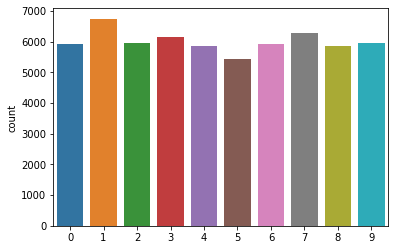

In [4]:
# Hangi rakamda kaç adet örneğimiz olduğunu grafikle gösterelim.
sns.countplot(y_train)

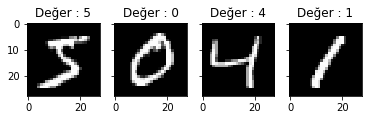

In [5]:
# El ile çizilmiş sayı verilerimizden 4 adet örnek gösterelim.
fig, axs = plt.subplots(1,4)

axs[0].imshow(x_train[0][:,:], cmap='gray')
axs[0].set_title("Değer : "+str(y_train[0]))

axs[1].imshow(x_train[1][:,:], cmap='gray')
axs[1].set_title("Değer : "+str(y_train[1]))

axs[2].imshow(x_train[2][:,:], cmap='gray')
axs[2].set_title("Değer : "+str(y_train[2]))

axs[3].imshow(x_train[3][:,:], cmap='gray')
axs[3].set_title("Değer : "+str(y_train[3]))

# Karışıklığa sebep olan gereksiz labelleri kaldırmak için ufak bir döngü.
for ax in axs.flat:
    ax.label_outer()

plt.show()

In [6]:
# X değerlerimizin şekline derinlik özelliği ekleyelim.

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
#değişkenlerimizin boyutlarını düzenliyoruz.
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [9]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
# Aydınlatma farklılıklarının etkisini azaltmak için bir normalleştirme gerçekleştiriyoruz.
# Ayrıca CNN [0..1] verisine [0..255] 'den daha hızlı yakınsar.

In [11]:
x_train[0][6,:]

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [ 30],
       [ 36],
       [ 94],
       [154],
       [170],
       [253],
       [253],
       [253],
       [253],
       [253],
       [225],
       [172],
       [253],
       [242],
       [195],
       [ 64],
       [  0],
       [  0],
       [  0],
       [  0]], dtype=uint8)

In [12]:
#int'den float'a çeviriyoruz çünkü float sonuç elde edicez bir sonraki işlemde
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [13]:
#piksellerin değerleri dataset içerisinde 0-255 arasında 
#0 = beyaz
#255 - siyah
# bunları 0-1 arasında değerler yapabilmek için 255 e bölüyoruz
# Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).
x_train /= 255
x_test /= 255

In [14]:
x_train[0][6,:]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.11764706],
       [0.14117648],
       [0.36862746],
       [0.6039216 ],
       [0.6666667 ],
       [0.99215686],
       [0.99215686],
       [0.99215686],
       [0.99215686],
       [0.99215686],
       [0.88235295],
       [0.6745098 ],
       [0.99215686],
       [0.9490196 ],
       [0.7647059 ],
       [0.2509804 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

# Etiketleri One Hot Vektörlere Çevirmemiz Gerekiyor :

In [15]:
print(y_train[0])
print(y_train[1])
print(y_train[2])
print(y_train[3])

5
0
4
1


In [16]:
# Etiketler 0 ila 9 arasındaki 10 adet rakamlardan oluşur.
# Bu etiketlere "to_catogorical" fonksiyonu ile one-hot-encoding yapıyoruz
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [17]:
print(y_train[0])
print(y_train[1])
print(y_train[2])
print(y_train[3])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# Katmanları Oluşturup Eğitime Başlayalım :

In [18]:
# Sequential model objesi yaratalım
model = Sequential()

# 3x3 boyutunda 32 adet filtreden oluşan ReLU aktivasyonlu CONV katmanı ekleyelim. 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# 3x3 boyutunda 64 adet filtreden oluşan ReLU aktivasyonlu CONV katmanı ekleyelim. 
model.add(Conv2D(64, (3, 3), activation='relu'))

# 2x2 boyutlu çerçeveden oluşan MAXPOOL katmanı ekleyelim.
# Resim matrisimizi küçültüyoruz. İşlem gücünü azaltıyoruz 
model.add(MaxPooling2D(pool_size=(2, 2)))

# her seferinde nöronların %25'i atılsın (drop)
# Overfitting olmasını engellemek için kullanılır
model.add(Dropout(0.25))

# Tam bağlantılı (fully connected) katmanına geçiş olacağı için düzleştirme yapalım 
model.add(Flatten())

# 128 nörondan oluşan ReLU aktivasyonu FC katmanı ekleyelim 
model.add(Dense(128, activation='relu'))

# Her seferinde %50'sini atalım (drop)
# Overfitting olmasını engellemek için kullanılır
model.add(Dropout(0.5))

# Çıkış katmanına sınıf sayısı kadar (10) Softmax aktivasyonlu nöron ekleyelim
model.add(Dense(num_classes, activation='softmax'))

# Adadelta optimizasyon yöntemini ve cross entropy yitim (loss) fonksiyonunu kullanalım.
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# eğitim işlemini gerçekleştirelim
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# test işlemini gerçekleştirelim ve sonuçları ekrana yazdıralım
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 57s 958us/step - loss: 0.2599 - accuracy: 0.9190 - val_loss: 0.0509 - val_accuracy: 0.9842
Epoch 2/12
60000/60000 [==============================] - 57s 944us/step - loss: 0.0832 - accuracy: 0.9754 - val_loss: 0.0386 - val_accuracy: 0.9869
Epoch 3/12
60000/60000 [==============================] - 57s 943us/step - loss: 0.0664 - accuracy: 0.9807 - val_loss: 0.0296 - val_accuracy: 0.9908
Epoch 4/12
60000/60000 [==============================] - 55s 920us/step - loss: 0.0509 - accuracy: 0.9849 - val_loss: 0.0312 - val_accuracy: 0.9890
Epoch 5/12
60000/60000 [==============================] - 56s 939us/step - loss: 0.0465 - accuracy: 0.9857 - val_loss: 0.0265 - val_accuracy: 0.9906
Epoch 6/12
60000/60000 [==============================] - 58s 966us/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0273 - val_accuracy: 0.9912
Epoch 7/12
60000/60000 [==============================] 

# Sonuçları Değerlendirelim : 

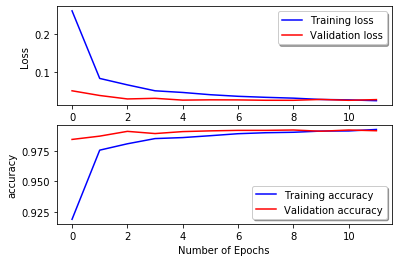

In [19]:
# Eğitimde gerçekleşen loss ve accuracy değerlerini çizdirelim
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].set_ylabel("Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_xlabel("Number of Epochs")
ax[1].set_ylabel("accuracy")
legend = ax[1].legend(loc='best', shadow=True)

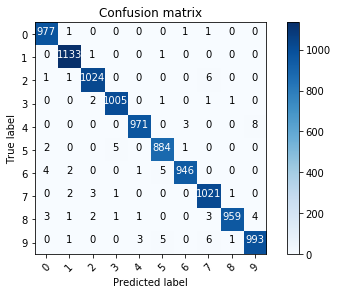

In [20]:
# Confusion matrix oluşturalım. 
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# x_test'in tahmin sonuçlarını alalım
y_pred = model.predict(x_test)
# y_pred'i one hot vektörüne çevirelim 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Doğru sonuçlar olan y_test'i de one hot vektörüne çevirelim
y_true = np.argmax(y_test,axis = 1) 
# confusion matrix oluşturalım 
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# confusion matrix çizdirelim
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

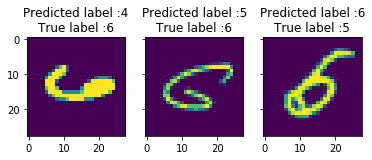

In [21]:
# Bazı hataları gösterelim :  

# Hatalar, tahmin edilen etiketler ile gerçek etiketler arasındaki farktır
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """Bu işlem tahmin edilen ve doğru etikeri olan 3 resmi gösterir"""
    n = 0
    nrows = 1
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[col].imshow((img_errors[error]).reshape((28,28)))
            ax[col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Yanlış öngörülen sayıların olasılıkları
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Hata setindeki gerçek değerlerin tahmini olasılıkları
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Öngörülen etiketin olasılığı ile gerçek etiket arasındaki fark
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Delta prob hatalarının sıralı listesi
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# ilk 3 hata  
most_important_errors = sorted_dela_errors[-3:]

# ilk 3 hatayı göster
display_errors(most_important_errors, x_test_errors, y_pred_classes_errors, y_true_errors)